In [32]:
#https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6

- p: The order of the auto-regressive (AR) model (i.e., the number of lag observations). A time series is considered AR when previous values in the time series are very predictive of later values. An AR process will show a very gradual decrease in the ACF plot.
- d: The degree of differencing.
- q: The order of the moving average (MA) model. This is essentially the size of the “window” function over your time series data. An MA process is a linear combination of past errors.

In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings('ignore')
import pickle
from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm

import panel as pn
from pmdarima.arima import auto_arima
from xgboost import XGBRegressor
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

## load data

In [3]:
data_location = "C:/Users/hotaha/OneDrive - dormakaba Group/Desktop/Python/Data/"
#df = pd.read_excel(data_location + "sensordata_ED250_GE10_25-271022.xlsx")
#X, y = df.iloc[:, :-2], df.iloc[:, -1]
#df = pd.read_csv(data_location + "export_ED250_GE10 81122 - 4 wochen.csv")
df = pd.read_csv(data_location + "export_sensor_data_laks.csv")
df=df[:500]
df

,ID,ds,y
0,0,2007-12-10,9.5908
1,1,2007-12-11,8.5196
2,2,2007-12-12,8.1837
3,3,2007-12-13,8.0725
4,4,2007-12-14,7.8936
...,...,...,...
495,500,2009-04-23,7.4742
496,501,2009-04-24,7.6718
497,502,2009-04-25,7.8423
498,503,2009-04-26,7.9241


In [4]:
df = df.rename(columns={
    0: "DT",
    1: "DT 2",
    2: "DT 3",
    
    3: "Position",
    "ds": "Month",
   "Month": "#Month",
    "y": "#y",
    7: "DebugText",
    8: "TargetAcceleration",
    9: "GearControl",
   
})
df

,ID,Month,#y
0,0,2007-12-10,9.5908
1,1,2007-12-11,8.5196
2,2,2007-12-12,8.1837
3,3,2007-12-13,8.0725
4,4,2007-12-14,7.8936
...,...,...,...
495,500,2009-04-23,7.4742
496,501,2009-04-24,7.6718
497,502,2009-04-25,7.8423
498,503,2009-04-26,7.9241


In [5]:
df=df.drop(columns=['ID'], axis=1)

In [6]:
df

,Month,#y
0,2007-12-10,9.5908
1,2007-12-11,8.5196
2,2007-12-12,8.1837
3,2007-12-13,8.0725
4,2007-12-14,7.8936
...,...,...
495,2009-04-23,7.4742
496,2009-04-24,7.6718
497,2009-04-25,7.8423
498,2009-04-26,7.9241


In [7]:
#df2=df.groupby(by=[df.index.month, df.index.year])

In [8]:
df['Month']=pd.to_datetime(df['Month'].astype(str), format='%Y-%m-%d')

In [9]:
#df=df.drop_duplicates(subset=['Month'])

In [10]:
#df=df.sort_values(by=['Month'])

In [11]:

df=df.set_index(['Month'])
df

,#y
Month,
2007-12-10,9.5908
2007-12-11,8.5196
2007-12-12,8.1837
2007-12-13,8.0725
2007-12-14,7.8936
...,...
2009-04-23,7.4742
2009-04-24,7.6718
2009-04-25,7.8423


In [12]:
#df=df.reset_index()

In [13]:
#df

In [14]:
#X = pd.to_datetime(df['Month'])

#X

## Fill date gaps 

In [15]:
#df['Month'] = pd.to_datetime(df['Month'])

df['#y2']= df['#y'].resample('D').mean()

#df = df.set_index('Month') 

In [16]:
date_new= df['#y'].resample('D').mean()

In [17]:
df['Month']=date_new

In [18]:
df2=date_new.to_frame()
df2

,#y
Month,
2007-12-10,9.5908
2007-12-11,8.5196
2007-12-12,8.1837
2007-12-13,8.0725
2007-12-14,7.8936
...,...
2009-04-23,7.4742
2009-04-24,7.6718
2009-04-25,7.8423


In [20]:
df=df2

In [21]:
#df2=X.resample('D', on=X).mean()
#df2=df2.reset_index()

#df2.tail(20)

In [22]:
#df.groupby(pd.Grouper(freq='M')) 

In [23]:
#df['month_index2'] = df.index.month
#df['month_index2']

In [24]:
#df['Month']=pd.to_datetime(df['Month'].astype(str), format='%Y-%m-%d')
df=df.sort_values(by=['Month'])

In [25]:
df

,#y
Month,
2007-12-10,9.5908
2007-12-11,8.5196
2007-12-12,8.1837
2007-12-13,8.0725
2007-12-14,7.8936
...,...
2009-04-23,7.4742
2009-04-24,7.6718
2009-04-25,7.8423


In [26]:
#df=df.drop_duplicates(subset=['Month'])
#df

In [27]:

#df=df.set_index(['Month'])
#df

In [28]:
df

,#y
Month,
2007-12-10,9.5908
2007-12-11,8.5196
2007-12-12,8.1837
2007-12-13,8.0725
2007-12-14,7.8936
...,...
2009-04-23,7.4742
2009-04-24,7.6718
2009-04-25,7.8423


In [29]:
df.dtypes

#y    float64
dtype: object

In [171]:
#df["#Passengers"]=str(df["#Passengers"])
#df.dtypes

## plot the data

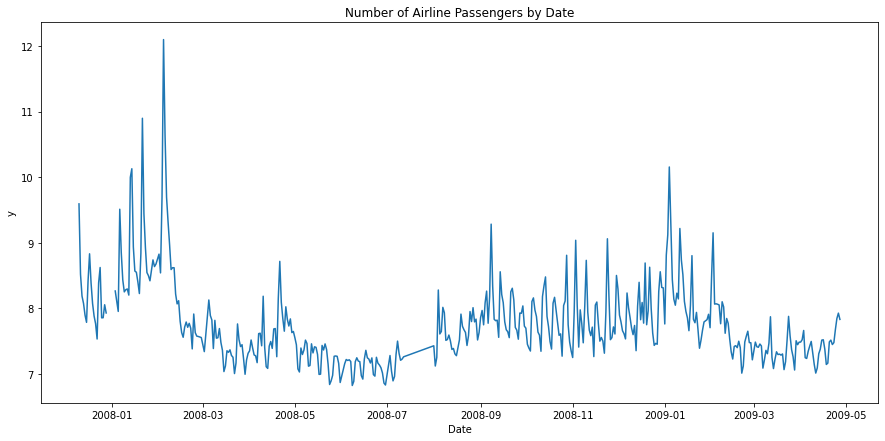

In [30]:
plt.figure(figsize=(15,7))
plt.title("Number of Airline Passengers by Date")
plt.xlabel('Date')
plt.ylabel('y')
plt.plot(df)
plt.show()

## <center>ARIMA Model Selection w/ Auto-ARIMA</center>


## fill values with mean values 

In [23]:
df.isnull().sum()

#y    5
dtype: int64

In [24]:
df['#y'].fillna(value=df['#y'].mean(), inplace=True)

In [25]:
df.isnull().sum()

#y    0
dtype: int64

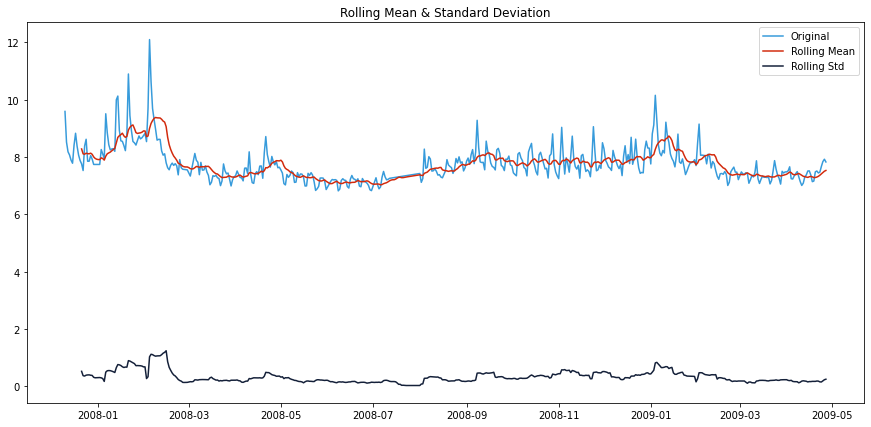

In [26]:
#Determine rolling statistics
df["rolling_avg"] = df["#y"].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
df["rolling_std"] = df["#y"].rolling(window=12).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(df["#y"], color='#379BDB', label='Original')
plt.plot(df["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(df["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [27]:
#auto_arima??

## ARIMA 

In [28]:
#Standard ARIMA Model
ARIMA_model = auto_arima(df['#y'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=True, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=431.001, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=507.135, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=505.691, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=500.314, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=505.173, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=412.987, Time=1.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=465.732, Time=0.29 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=414.962, Time=1.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=414.741, Time=1.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=413.379, Time=0.92 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=458.981, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=416.303, Time=1.94 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=411.166, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=429.279, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=463.7

In [33]:
file_name = "ARIMA_model_reg.pkl"

# save
#pickle.dump(ARIMA_model, open(file_name, "wb"))

# load
ARIMA_model = pickle.load(open(file_name, "rb"))

In [34]:


#ARIMA_model = sm.tsa.arima.ARIMA((df['#Passengers']),  order=(3,1,4))

(ARIMA_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  505
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -201.583
Date:                Sat, 12 Nov 2022   AIC                            411.166
Time:                        17:27:06   BIC                            428.056
Sample:                    12-10-2007   HQIC                           417.792
                         - 04-27-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5674      0.050     11.458      0.000       0.470       0.664
ar.L2         -0.2259      0.050     -4.542      0.000      -0.323      -0.128
ma.L1         -0.8226      0.044    -18.597      0.000      -0.909      -0.736
sigma2         0.1301      0.004     32.180      0.000       0.122       0.138
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              2215.45
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             2.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

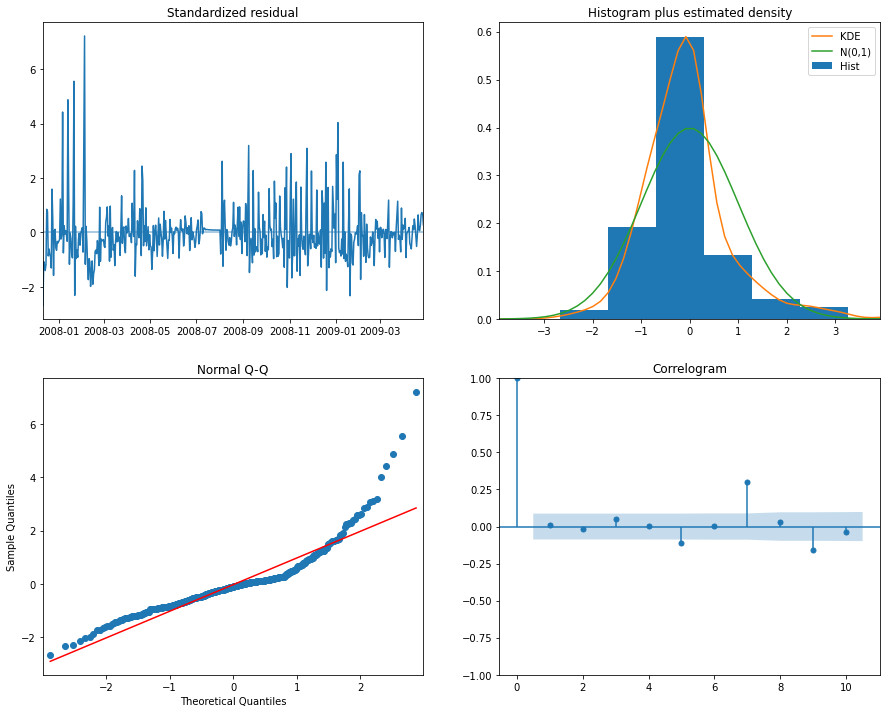

In [35]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

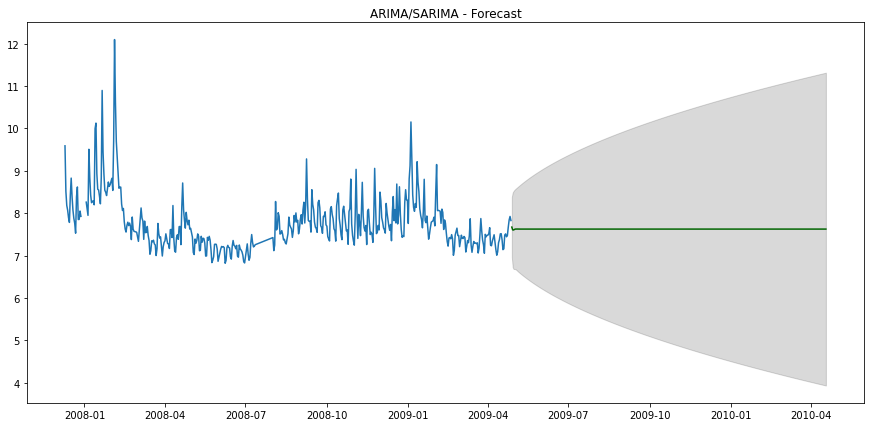

In [49]:
def forecast(ARIMA_model, periods=356):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    #pred = ARIMA_model.predict(n_periods=len(df["#y"]),dynamic=True)
    index_of_fc = pd.date_range(df.index[-1] + pd.DateOffset(days=1), periods = n_periods, freq='D')
    
    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df["#y"], color='#1f76b4')
    #plt.plot(pred, color='yellow')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast")
    plt.show()

forecast(ARIMA_model)

## <center>SARIMA Model Selection</center>


In [31]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(df["#y"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=8.92 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1014.503, Time=0.28 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=668.208, Time=2.74 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=621.562, Time=3.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1012.864, Time=0.13 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=802.117, Time=0.56 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=620.541, Time=4.56 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=700.393, Time=1.60 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=24.90 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=28.14 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=620.873, Time=10.17 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=666.278, Time=6.22 sec
 ARIMA(0,0,1)(2,1,2)[12] intercept   : AIC=inf, Time=30.84 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=876.689, Time=2.56 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=

In [37]:
file_name = "SARIMA_model_reg.pkl"

# save
#pickle.dump(SARIMA_model, open(file_name, "wb"))

# load
SARIMA_model = pickle.load(open(file_name, "rb"))

In [38]:
(SARIMA_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  505
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -305.271
Date:                            Sat, 12 Nov 2022   AIC                            620.541
Time:                                    17:28:07   BIC                            641.544
Sample:                                12-10-2007   HQIC                           628.787
                                     - 04-27-2009                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0167      0.010     -1.753      0.080      -0.035       0.002
ma.L1          0.6599      0.031     21.376      0.000       0.599       0.720
ar.S.L12       0.1278      0.047      2.741      0.006       0.036       0.219
ma.S.L12      -0.8154      0.045    -18.208      0.000      -0.903      -0.728
sigma2         0.1975      0.009     21.806      0.000       0.180       0.215
===================================================================================
Ljung-Box (L1) (Q):                  21.39   Jarque-Bera (JB):               726.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             1.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

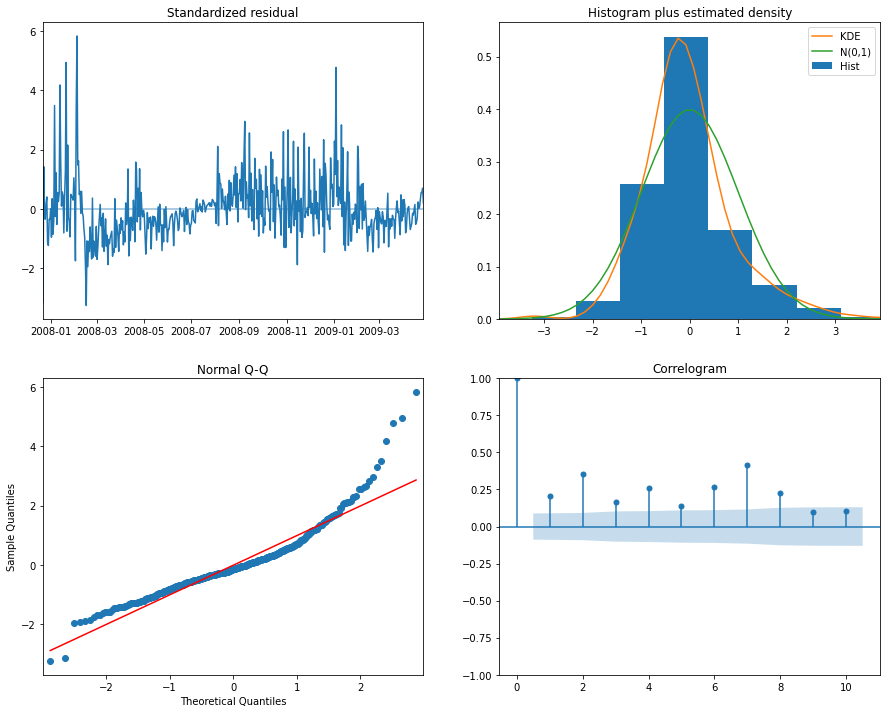

In [41]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

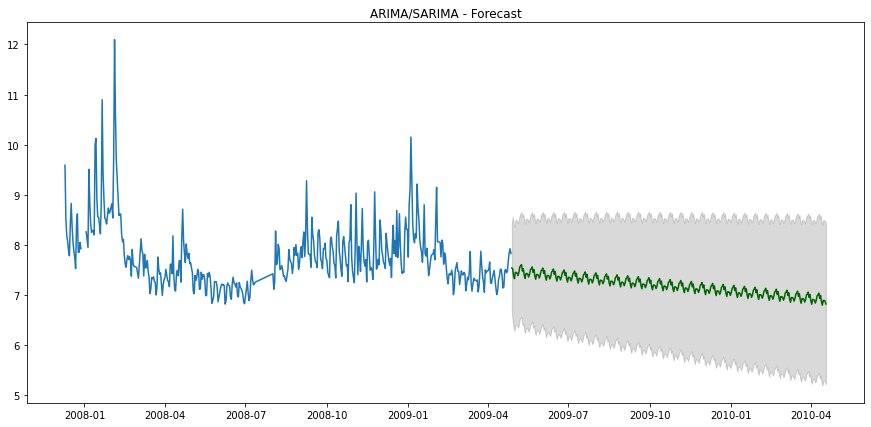

In [50]:
forecast(SARIMA_model)

## <center>SARIMAX Model Selection</center>



In [43]:
df['month_index'] = df.index.month
df['month_index']

Month
2007-12-10    12
2007-12-11    12
2007-12-12    12
2007-12-13    12
2007-12-14    12
              ..
2009-04-23     4
2009-04-24     4
2009-04-25     4
2009-04-26     4
2009-04-27     4
Freq: D, Name: month_index, Length: 505, dtype: int64

In [40]:
#adding exogenous variable
df['month_index'] = df.index.month

# SARIMAX Model
SARIMAX_model = pm.auto_arima(df[['#y']], exogenous=df[['month_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, 
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

SARIMAX_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=8.58 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1014.503, Time=0.32 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=668.208, Time=2.73 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=621.562, Time=3.05 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1012.864, Time=0.11 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=802.117, Time=0.43 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=620.541, Time=4.90 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=700.393, Time=1.89 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=24.12 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=27.60 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=620.873, Time=10.03 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=666.278, Time=6.11 sec
 ARIMA(0,0,1)(2,1,2)[12] intercept   : AIC=inf, Time=30.96 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=876.689, Time=2.59 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  505
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -305.271
Date:                            Sat, 12 Nov 2022   AIC                            620.541
Time:                                    09:07:51   BIC                            641.544
Sample:                                12-10-2007   HQIC                           628.787
                                     - 04-27-2009                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0167      0.010     -1.753      0.080      -0.035       0.002
ma.L1          0.6599      0.031     21.376      0.000       0.599       0.720
ar.S.L12       0.1278      0.047      2.741      0.006       0.036       0.219
ma.S.L12      -0.8154      0.045    -18.208      0.000      -0.903      -0.728
sigma2         0.1975      0.009     21.806      0.000       0.180       0.215
===================================================================================
Ljung-Box (L1) (Q):                  21.39   Jarque-Bera (JB):               726.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             1.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
file_name = "SARIMAX_model_reg.pkl"

# save
#pickle.dump(SARIMAX_model, open(file_name, "wb"))

# load
SARIMAX_model = pickle.load(open(file_name, "rb"))

#y_pred_load=model_loaded.predict(X)

In [45]:
SARIMAX_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  505
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -305.271
Date:                            Sat, 12 Nov 2022   AIC                            620.541
Time:                                    17:29:49   BIC                            641.544
Sample:                                12-10-2007   HQIC                           628.787
                                     - 04-27-2009                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0167      0.010     -1.753      0.080      -0.035       0.002
ma.L1          0.6599      0.031     21.376      0.000       0.599       0.720
ar.S.L12       0.1278      0.047      2.741      0.006       0.036       0.219
ma.S.L12      -0.8154      0.045    -18.208      0.000      -0.903      -0.728
sigma2         0.1975      0.009     21.806      0.000       0.180       0.215
===================================================================================
Ljung-Box (L1) (Q):                  21.39   Jarque-Bera (JB):               726.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             1.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We can see that similar to the SARIMA model we are getting some pretty good-looking predictions and the width of the forecasted confidence interval has decreased. This means that the model is more certain of its predictions.

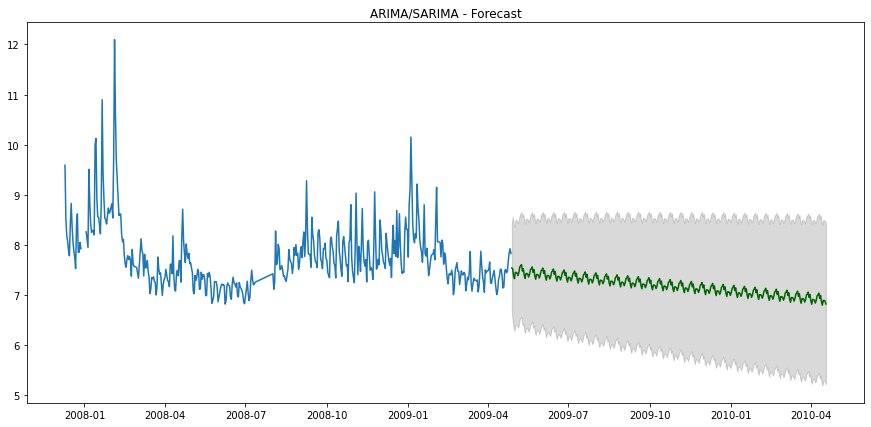

In [51]:
forecast(SARIMAX_model)